# Imports

## Import des libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split
from sklearn.model_selection import train_test_split

# Models classifications 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics evaluations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# Import des données

In [3]:
df = pd.read_csv("data/df_scaled.csv")

In [4]:
df

,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,"('household_size',)","('age_of_respondent',)"
0,2018,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,-0.358007,-0.896188
1,2018,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.539834,1.888279
2,2018,1,1,1,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0.539834,-0.775124
3,2018,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.539834,-0.290869
4,2018,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1.886596,-0.775124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0.090914,0.556577
23520,2018,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,-0.806927,-0.714592
23521,2018,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0.539834,-0.714592
23522,2018,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1.437676,-0.532997


In [5]:
def balance_dataset(df, nb):
    grouped = df.groupby('bank_account')
    df_sampled = grouped.apply(lambda x: x.sample(nb) if len(x) > nb else x)
    df_sampled = df_sampled.reset_index(drop=True)
    return df_sampled

In [6]:
df_unbalanced = balance_dataset(df, 3300)

In [7]:
df_unbalanced["bank_account"].value_counts()

0    3300
1    3300
Name: bank_account, dtype: int64

# Logistic regression

In [8]:
X = df_unbalanced.drop(["bank_account", "gender_of_respondent"], axis = 1)
y = df_unbalanced["bank_account"]

In [9]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

#Train the model
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

#Test the model
predictions = model.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

[(0, 2630), (1, 2630)]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       670
           1       0.77      0.74      0.76       650

    accuracy                           0.76      1320
   macro avg       0.76      0.76      0.76      1320
weighted avg       0.76      0.76      0.76      1320



/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


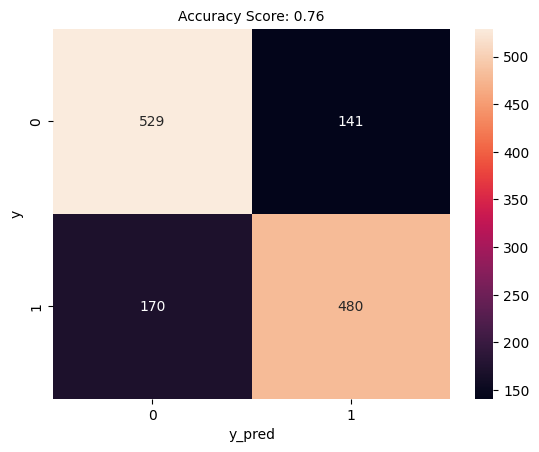

In [10]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
     acc = round(accuracy_score(y, y_pred), 2)
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.title('Accuracy Score: {0}'.format(acc), size=10)
     plt.show()

plot_confusion_matrix(y_test, predictions)

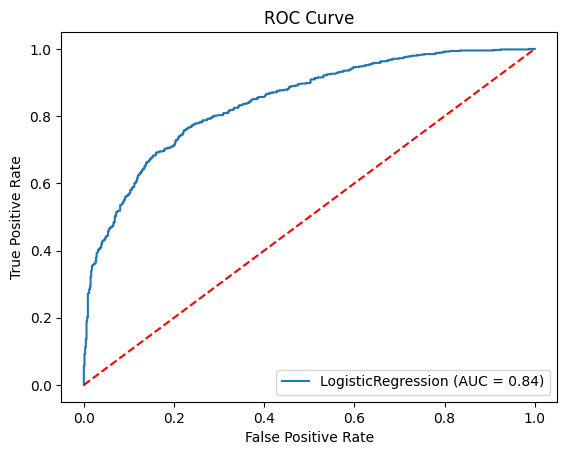

AUC score: 0.8427244546498278


In [11]:
# ROC Curve
plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC to have diabetes
y_prob = model.predict_proba(X_test)
print("AUC score:",roc_auc_score(y_test, y_prob[:, 1]))

In [12]:
df_y = pd.DataFrame(predictions, columns = ["predictions"])

In [14]:
X_reset =X_test.reset_index()

In [15]:
df_pred_1 = pd.concat([X_reset, df_y], axis = 1)

In [16]:
y_reset = y_test.reset_index()

In [17]:
df_pred = pd.concat([df_pred_1, y_reset], axis = 1)

In [18]:
df_pred

,index,year,location_type,cellphone_access,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,"('household_size',)","('age_of_respondent',)",predictions,index,bank_account
0,5430,2018,1,1,1,0,0,0,0,0,...,0,1,0,0,0,-0.358007,-1.319911,0,5430,1
1,2876,2017,1,1,0,0,0,0,0,1,...,1,0,0,1,0,-0.806927,0.072322,0,2876,0
2,1695,2016,0,1,0,1,0,0,0,0,...,1,0,1,0,0,-0.358007,-0.654060,1,1695,0
3,4246,2018,1,1,0,1,0,0,0,0,...,1,1,0,0,0,0.539834,0.374982,1,4246,1
4,683,2016,0,1,0,0,0,0,0,1,...,0,0,1,0,0,2.335517,0.011790,0,683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,414,2017,1,1,0,1,0,0,0,0,...,1,0,0,1,0,-0.806927,-0.290869,0,414,0
1316,3693,2018,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0.988755,-0.593529,1,3693,1
1317,654,2017,1,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.806927,-1.259379,0,654,0
1318,4213,2018,0,1,0,1,0,0,0,0,...,1,1,0,0,0,-0.358007,-0.411933,1,4213,1


In [19]:
bk_pivot = pd.pivot_table(data = df_pred[df_pred["bank_account"] == 1], index = "relationship_with_head_Head of Household", values = "bank_account", aggfunc = 'count')

# Decision tree

In [38]:
#Split the data into 80% training and 20% testing
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus_3, y_train_rus_3= rus.fit_resample(X_train_3, y_train_3)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Fit dt to the training set
clf.fit(X_train_3, y_train_3)

# Predict test set labels
y_pred_dt = clf.predict(X_test_3)

#Check precision, recall, f1-score
print( classification_report(y_test_3, y_pred_dt))

[(0, 2630), (1, 2630)]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       670
           1       0.70      0.68      0.69       650

    accuracy                           0.70      1320
   macro avg       0.70      0.70      0.70      1320
weighted avg       0.70      0.70      0.70      1320



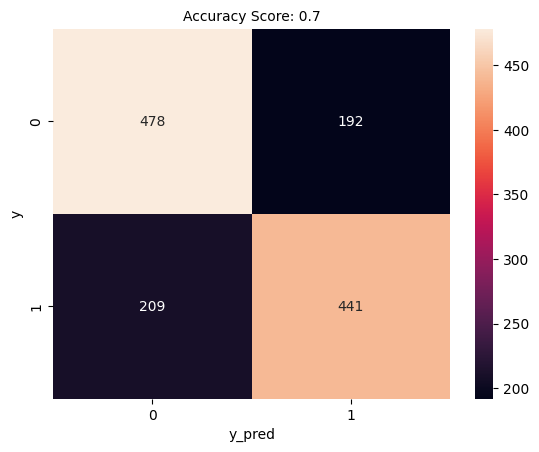

In [39]:
plot_confusion_matrix(y_test_3, y_pred_dt)

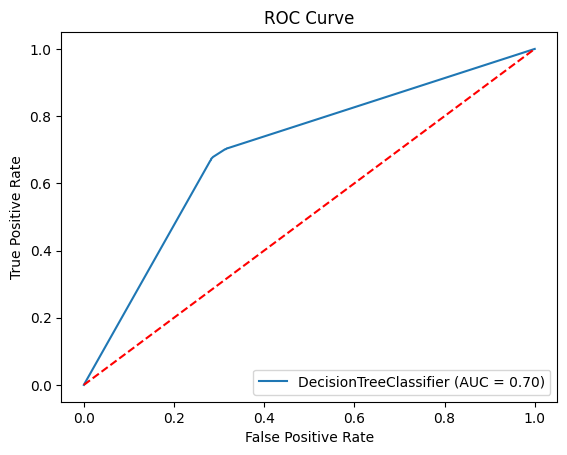

AUC score: 0.7005109070034442


In [40]:
# ROC Curve
plot_roc_curve(clf, X_test_3, y_test_3)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC to have diabetes
y_prob = clf.predict_proba(X_test_3)
print("AUC score:",roc_auc_score(y_test_3, y_prob[:, 1]))

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

#Split the data into 80% training and 20% testing
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus_4, y_train_rus_4= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus_4).items()))

gnb = GaussianNB()
gnb.fit(X_train_4, y_train_4)
y_pred_gnb = gnb.predict(X_test_4)

#Check precision, recall, f1-score
print( classification_report(y_test_4, y_pred_gnb))

[(0, 2630), (1, 2630)]
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       670
           1       0.88      0.40      0.55       650

    accuracy                           0.68      1320
   macro avg       0.75      0.67      0.65      1320
weighted avg       0.75      0.68      0.65      1320



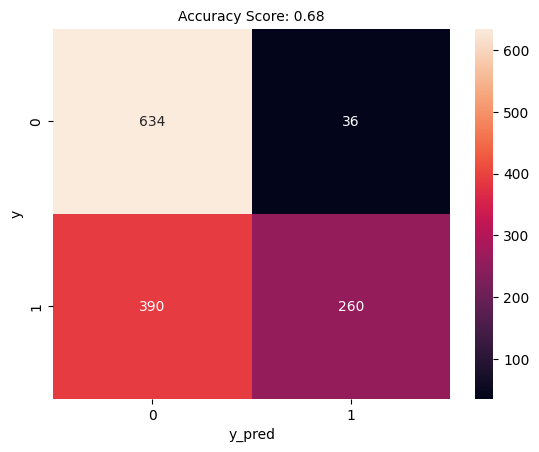

In [42]:
plot_confusion_matrix(y_test_4, y_pred_gnb)

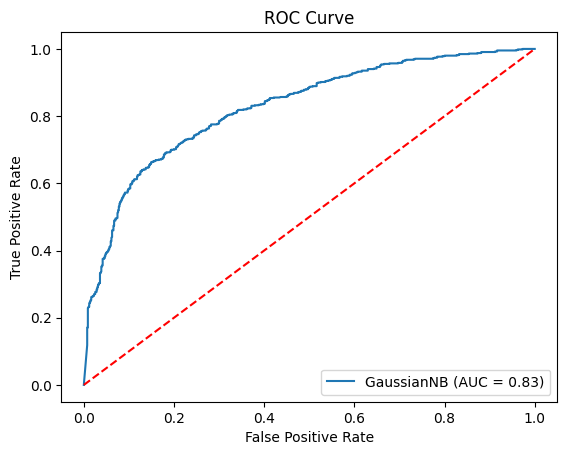

AUC score: 0.8262525832376579


In [43]:
# ROC Curve
plot_roc_curve(gnb, X_test_4, y_test_4)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC to have diabetes
y_prob = gnb.predict_proba(X_test_4)
print("AUC score:",roc_auc_score(y_test_4, y_prob[:, 1]))